## Loading Dataset

In [30]:
#Supress warnings

import warnings
warnings.filterwarnings("ignore")

In [31]:
import numpy as np
import pandas as pd

In [32]:
#Read the dataset

df = pd.read_csv("population_diabetes.csv")

In [34]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
df.shape

(768, 9)

####  Check if all the features are numeric.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
df['Age'].mean()

33.240885416666664

In [37]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [38]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

##  Data Cleaning

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

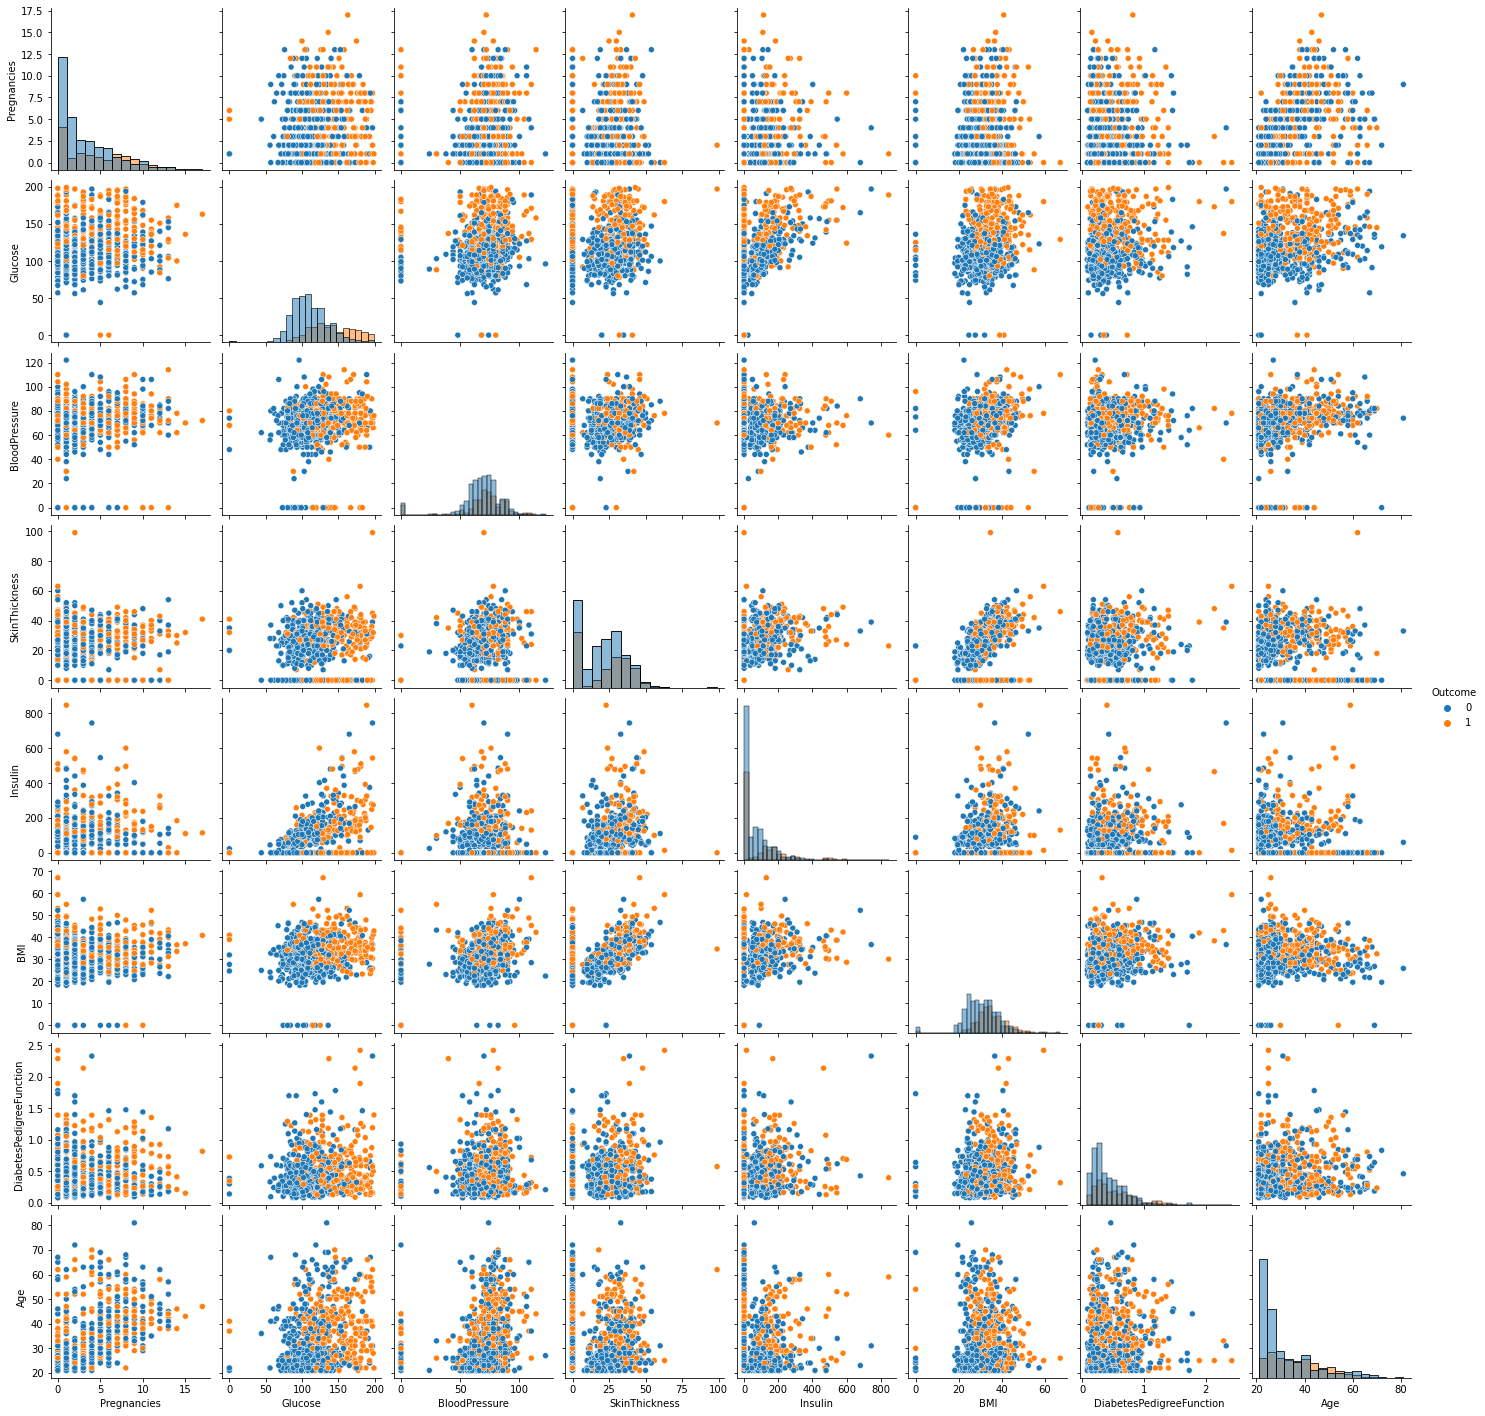

In [43]:
sns.pairplot(df,hue="Outcome", diag_kind = 'hist')
plt.show()

Pairpot analysis: Histograms for glucose, blood pressure, skin thickness, insulin, and BMI seem to be bimodal distribution

In [44]:
#Using null function

print(df.isnull().any().sum())
print(df.isnull().sum())

0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


####  Given dataset contains many 0(zero) values, replace 0 with NaN value.

In [45]:
df["Glucose"] = df["Glucose"].replace(0, np.NaN)
df["BloodPressure"] = df["BloodPressure"].replace(0, np.NaN)
df["SkinThickness"] = df["SkinThickness"].replace(0, np.NaN)
df["Insulin"] = df["Insulin"].replace(0, np.NaN)
df["BMI"] = df["BMI"].replace(0, np.NaN)

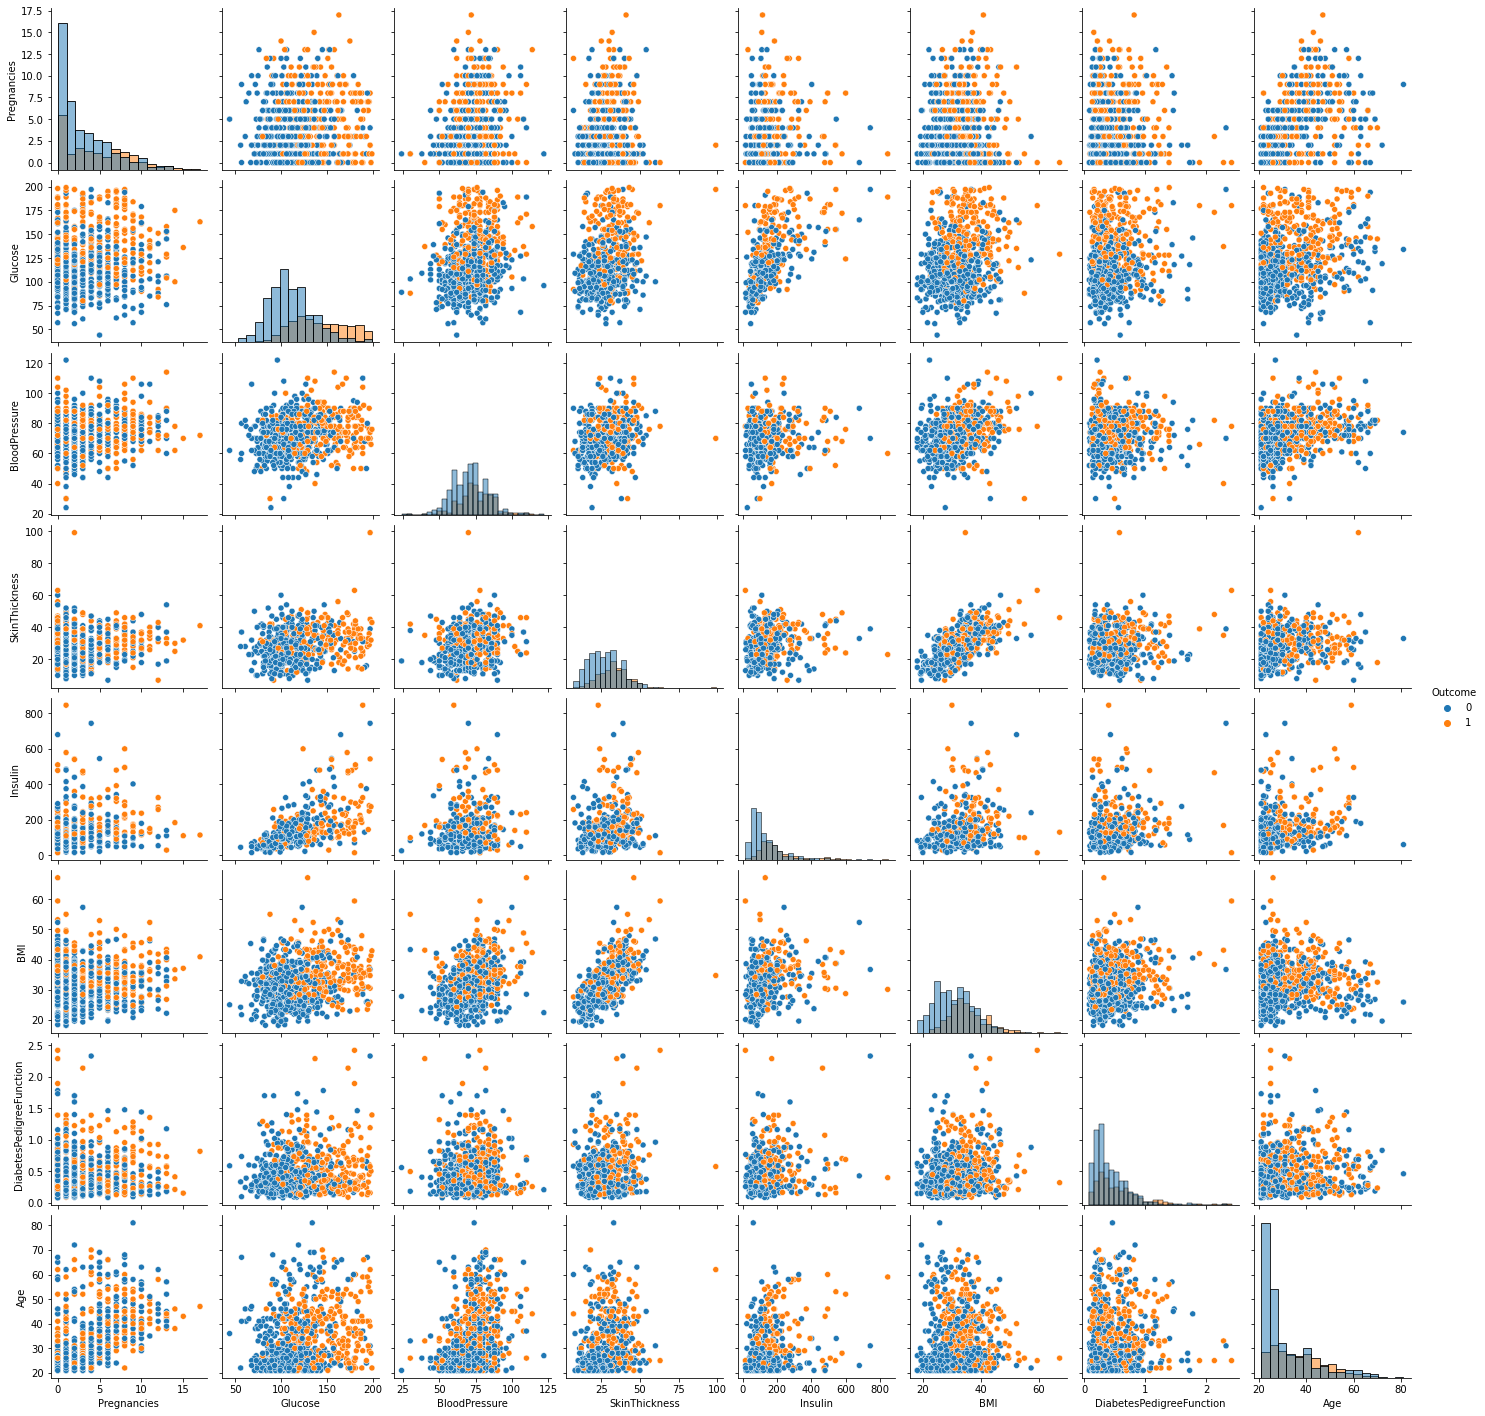

In [47]:
sns.pairplot(df,hue="Outcome", diag_kind = 'hist')
plt.show()

Executing the first line of given code replaced any zero values with null. Doing this basically ignored the data point while calculating mean or median. Hence, we can see a normal distribution now.

###### Important:  zeros in Pragnancy column indicates a feature which could not considered as Missing Value rather zeros present in rest of the columns are to considered as a missing value

In [48]:
df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [49]:
df.isna().sum() 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

####  Replace NaN with mean , median, mode.

Executing second line of code tells us that there are null values in glucose, blood pressure, skin thickness, insulin, and BMI which need to be relpaced. 

In [50]:
df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True) 

Executing the given line of code replaced all null values with the median of the individual feature.

In my opinion replacing null values with either mean or median is valid in this case because we have low number of measurements. However, if we had a large number of measurements, we could have basically dropped those null measurements.

In [52]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Correlation Matrix

####  Get the correlation matrix of each column,

In [53]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419451  0.231049                  0.137327   
BloodPressure             0.045363  0.281257                 -0.002378   
SkinThickness             0.155610  0.543205                  0.102188   
Insulin                   1.000000  0.180241                  0.126503   
BMI                       0.180241  1.000000                  0.153438   
DiabetesPedigreeFunction  0.126503  0.153438                  1.000000   
Age                       0.097101  0.025597                  0.033561   
Outcome                   0.203790  0.312038                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.126107  0.214873  
Insulin                   0.097101  0.203790  
BMI                       0.025597  0.312038  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<AxesSubplot:>

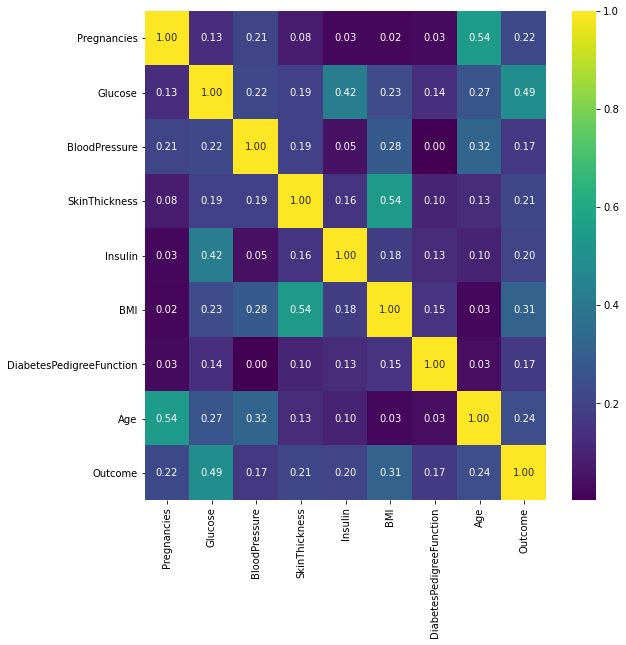

In [56]:
#plotting heatmap 

plt.figure(figsize= (9,9))
sns.heatmap(np.abs(df.corr()), annot=True, cmap="viridis", fmt="0.2f")

Pregnancy has highest correlation with age (0.544341). 

Glucose has highest correlation with outcome (0.492782).

In [54]:
df.groupby(['Outcome']).mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.682000      70.920000      27.726000  127.792000   
1           4.865672  142.130597      75.123134      31.686567  164.701493   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.885600                  0.429734  31.190000  
1        35.383582                  0.550500  37.067164

Each features has lower average value with outcome 0 (no diabetes) compared to Outcome 1 (diabetes).

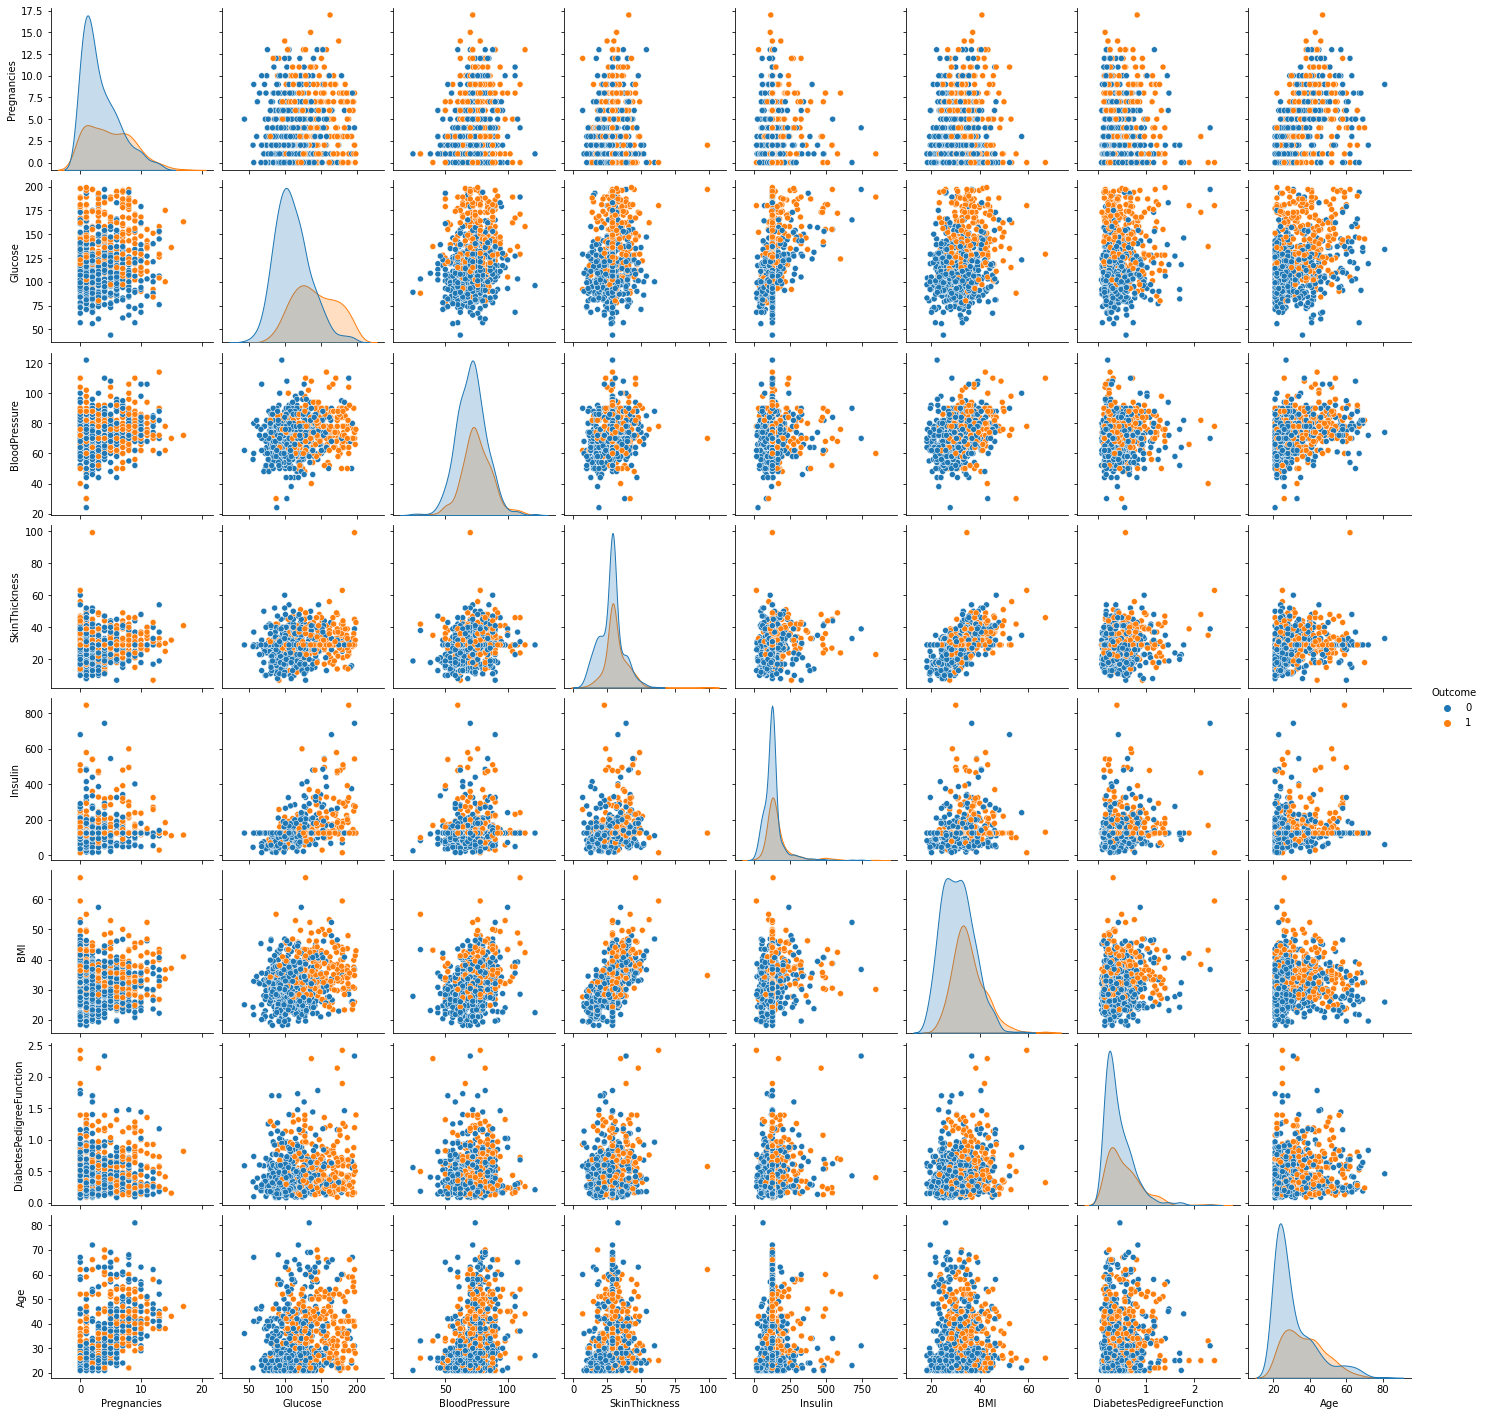

In [55]:
sns.pairplot(df,hue = 'Outcome')

((array([-3.12069362e+00, -2.84945435e+00, -2.69768447e+00, -2.59044160e+00,
         -2.50664754e+00, -2.43745274e+00, -2.37827016e+00, -2.32640403e+00,
         -2.28013073e+00, -2.23827901e+00, -2.20001550e+00, -2.16472534e+00,
         -2.13194152e+00, -2.10130063e+00, -2.07251420e+00, -2.04534920e+00,
         -2.01961466e+00, -1.99515202e+00, -1.97182811e+00, -1.94953002e+00,
         -1.92816110e+00, -1.90763799e+00, -1.88788828e+00, -1.86884861e+00,
         -1.85046325e+00, -1.83268292e+00, -1.81546377e+00, -1.79876666e+00,
         -1.78255649e+00, -1.76680162e+00, -1.75147347e+00, -1.73654612e+00,
         -1.72199598e+00, -1.70780152e+00, -1.69394305e+00, -1.68040247e+00,
         -1.66716316e+00, -1.65420979e+00, -1.64152817e+00, -1.62910519e+00,
         -1.61692865e+00, -1.60498724e+00, -1.59327041e+00, -1.58176831e+00,
         -1.57047175e+00, -1.55937212e+00, -1.54846135e+00, -1.53773186e+00,
         -1.52717653e+00, -1.51678867e+00, -1.50656194e+00, -1.49649040e+00,

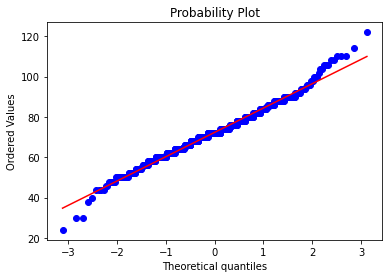

In [59]:
stats.probplot(df['BloodPressure'], plot = plt)

In [60]:
#normality test
#H0: Blood pressure is normally distributed
#H1: Blood pressure isn't normally distributed
# alpha = 0.01

stats.normaltest(df['BloodPressure'])

NormaltestResult(statistic=21.014516861396352, pvalue=2.7337301565003257e-05)

Since, p-value is smaller than alpha, we conculde H1 i.e., Blood pressure isn't normally distributed. 

In [61]:
df['BloodPressure'].mean() 

72.38671875

In [62]:
np.percentile(df['BloodPressure'],[2.5,97.5]) 

array([50., 96.])

95% confidence interval means we are 95% certain that the mean falls within this range. 

In [63]:
np.percentile(df['BloodPressure'],[0.5,99.5]) 

array([ 39.67, 110.  ])

99% confidence interval means we are 99% certain that the mean falls within this range.

Yes, the mean falls within both of the confidence interval 95% and 99%.

####  Inferential Statistics

In [64]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [65]:
# A()

#H0: The blood pressure of people without diabetes is not significantly different than the mean BP of population
#H1: The blood pressure of people without diabetes is significantly different than the mean BP of population
# alpha = 0.01

stats.ttest_1samp(df[df['Outcome'] == 0]['BloodPressure'], popmean = 71)

Ttest_1sampResult(statistic=-0.1499536162128066, pvalue=0.8808618001852418)

Since p-value is higher than alpha, we fail to reject H0. i.e. we conclude the blood pressure of people without diabetes is not significantly different than the mean BP of population.

In [66]:
# B()

#H0: The blood pressure of people with diabetes is not significantly different than the mean BP of population
#H1: The blood pressure of people with diabetes is significantly different than the mean BP of population
# alpha = 0.01

stats.ttest_1samp(df[df['Outcome'] == 1]['BloodPressure'], popmean = 71)

Ttest_1sampResult(statistic=5.647629811136108, pvalue=4.158548511042713e-08)

Since p-value is less than alpha, we reject H0. i.e. we conclude the blood pressure of people with diabetes is significantly different than the mean BP of population.

In [67]:
# C()

#H0: mean blood pressure of people with and without diabetes in this sample is not significantly different. 
#H1: mean blood pressure of people with and without diabetes in this sample is significantly different. 
# alpha: 0.01 

stats.ttest_ind(df[df['Outcome'] == 1]['BloodPressure'], df[df['Outcome'] == 0]['BloodPressure'])

Ttest_indResult(statistic=4.65097622072597, pvalue=3.8908354906479115e-06)

Since p-value is less than alpha, we reject H0. i.e. we conclude the mean blood pressure of people with and without diabetes in this sample is significantly different.

In [68]:
 # I chose insulin 

#H0: mean insulin level of people with and without diabetes in this sample is not significantly different. 
#H1: mean insulin level of people with and without diabetes in this sample is significantly different. 
# alpha: 0.01 

stats.ttest_ind(df[df['Outcome'] == 1]['Insulin'], df[df['Outcome'] == 0]['Insulin'])

Ttest_indResult(statistic=5.76114539252401, pvalue=1.210025703412445e-08)

Since p-value is less than alpha, we reject H0. i.e. we conclude the mean insulin level of people with and without diabetes in this sample is significantly different.

#### Descriptive statistics of each column.

In [69]:
df.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.656250  30.438286  44.000   99.75000   
BloodPressure             768.0   72.386719  12.096642  24.000   64.00000   
SkinThickness             768.0   29.108073   8.791221   7.000   25.00000   
Insulin                   768.0  140.671875  86.383060  14.000  121.50000   
BMI                       768.0   32.455208   6.875177  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              29.0000   32.00000   99.00  
Insulin                   125.0000  127.25000  846.00  
BMI                        32.3000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00